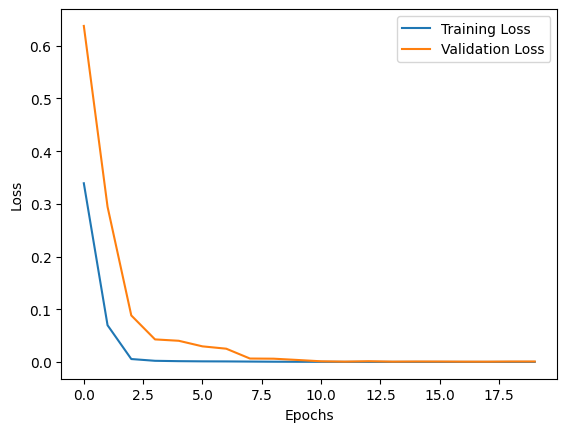

3/3 [==============================] - 0s 7ms/step


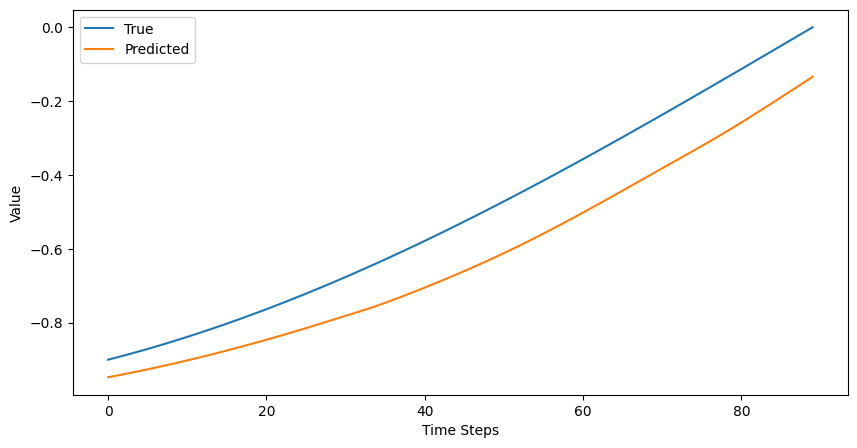

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Generate a simple sequential dataset
np.random.seed(23)
sequence_length = 500
sequence = np.sin(np.linspace(0, 2 * np.pi, sequence_length))

# Create input sequences and corresponding target values
X = []
y = []
sequence_length = 50  # Adjust as needed
for i in range(len(sequence) - sequence_length):
    X.append(sequence[i : i + sequence_length])
    y.append(sequence[i + sequence_length])

X = np.array(X)
y = np.array(y)

# Reshape the data for LSTM input
X = X.reshape(-1, sequence_length, 1)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(32, activation="relu", input_shape=(sequence_length, 1)))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mean_squared_error")

history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_split=0.1, verbose = 0)

# Plot training and validation loss
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Make predictions using the trained model
y_pred = model.predict(X_test)

# Plot the true vs. predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="True")
plt.plot(y_pred, label="Predicted")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.show()

Now think about how your results differ from the RNN predictions. Why?

(Hint: Think about the Data-generating process)

pi is an irrational number and is harder to predict especially when we take into account long-term memory because the relation is not easy to encapsulate due to the irrationality.